In [7]:
# Importing the data set 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from imblearn.over_sampling import RandomOverSampler
import seaborn as sns
HeartRisk = pd.read_csv('HeartDiseaseTrain-Test.csv')
HeartRisk.head(10)

age     sex chest_pain_type  resting_blood_pressure  cholestoral  \
0   52    Male  Typical angina                     125          212   
1   53    Male  Typical angina                     140          203   
2   70    Male  Typical angina                     145          174   
3   61    Male  Typical angina                     148          203   
4   62  Female  Typical angina                     138          294   
5   58  Female  Typical angina                     100          248   
6   58    Male  Typical angina                     114          318   
7   55    Male  Typical angina                     160          289   
8   46    Male  Typical angina                     120          249   
9   54    Male  Typical angina                     122          286   

      fasting_blood_sugar                      rest_ecg  Max_heart_rate  \
0    Lower than 120 mg/ml         ST-T wave abnormality             168   
1  Greater than 120 mg/ml                        Normal             155   
2    Lower than 120 mg/ml         ST-T wave abnormality             125   
3    Lower than 120 mg/ml         ST-T wave abnormality             161   
4  Greater than 120 mg/ml         ST-T wave abnormality             106   
5    Lower than 120 mg/ml                        Normal             122   
6    Lower than 120 mg/ml  Left ventricular hypertrophy             140   
7    Lower than 120 mg/ml                        Normal             145   
8    Lower than 120 mg/ml                        Normal             144   
9    Lower than 120 mg/ml                        Normal             116   

  exercise_induced_angina  oldpeak        slope vessels_colored_by_flourosopy  \
0                      No      1.0  Downsloping                           Two   
1                     Yes      3.1    Upsloping                          Zero   
2                     Yes      2.6    Upsloping                          Zero   
3                      No      0.0  Downsloping                           One   
4                      No      1.9         Flat                         Three   
5                      No      1.0         Flat                          Zero   
6                      No      4.4    Upsloping                         Three   
7                     Yes      0.8         Flat                           One   
8                      No      0.8  Downsloping                          Zero   
9                     Yes      3.2         Flat                           Two   

         thalassemia  target  
0  Reversable Defect       0  
1  Reversable Defect       0  
2  Reversable Defect       0  
3  Reversable Defect       0  
4       Fixed Defect       0  
5       Fixed Defect       1  
6             Normal       0  
7  Reversable Defect       0  
8  Reversable Defect       0  
9       Fixed Defect       0

In [2]:
# To see data types 
HeartRisk.dtypes 


age                                int64
sex                               object
chest_pain_type                   object
resting_blood_pressure             int64
cholestoral                        int64
fasting_blood_sugar               object
rest_ecg                          object
Max_heart_rate                     int64
exercise_induced_angina           object
oldpeak                          float64
slope                             object
vessels_colored_by_flourosopy     object
thalassemia                       object
target                             int64
dtype: object

In [3]:
HeartRisk['chest_pain_type'].unique()
HeartRisk['rest_ecg'].unique()
HeartRisk['slope'].unique()
HeartRisk['thalassemia'].unique()

array(['Reversable Defect', 'Fixed Defect', 'Normal', 'No'], dtype=object)

In [8]:
# Encode Categorical Variables, binary
numbering = {
    'sex':{'Female':0,'Male':1},
    'fasting_blood_sugar':{'Lower than 120 mg/ml':0, 'Greater than 120 mg/ml':1},
    'exercise_induced_angina':{'No':0, 'Yes':1},
    'vessels_colored_by_flourosopy':{'Two':2,'Zero':0,'One':1,'Three':3,'Four':4},
}
HeartRisk_new = HeartRisk.replace(numbering)
HeartRisk_new
# One hot encode non binary 
one_hot_chest_pain = pd.get_dummies(HeartRisk_new['chest_pain_type'], dtype=int)
HeartRisk_new = HeartRisk_new.drop('chest_pain_type', axis=1)
HeartRisk_new = HeartRisk_new.join(one_hot_chest_pain)
HeartRisk_new

one_hot_ecg = pd.get_dummies(HeartRisk_new['rest_ecg'], dtype=int)
HeartRisk_new = HeartRisk_new.drop('rest_ecg', axis=1)
HeartRisk_new = HeartRisk_new.join(one_hot_ecg)
HeartRisk_new

one_hot_slope = pd.get_dummies(HeartRisk_new['slope'], dtype=int)
HeartRisk_new = HeartRisk_new.drop('slope', axis=1)
HeartRisk_new = HeartRisk_new.join(one_hot_slope)
HeartRisk_new 

HeartRisk_new = pd.get_dummies(HeartRisk_new, columns=['thalassemia'], drop_first=True, dtype=int)
HeartRisk_new.head(50)



C:\Users\Control\AppData\Local\Temp\ipykernel_4600\3734290385.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  HeartRisk_new = HeartRisk.replace(numbering)


age  sex  resting_blood_pressure  cholestoral  fasting_blood_sugar  \
0    52    1                     125          212                    0   
1    53    1                     140          203                    1   
2    70    1                     145          174                    0   
3    61    1                     148          203                    0   
4    62    0                     138          294                    1   
5    58    0                     100          248                    0   
6    58    1                     114          318                    0   
7    55    1                     160          289                    0   
8    46    1                     120          249                    0   
9    54    1                     122          286                    0   
10   71    0                     112          149                    0   
11   43    0                     132          341                    1   
12   34    0                     118          210                    0   
13   51    1                     140          298                    0   
14   52    1                     128          204                    1   
15   34    0                     118          210                    0   
16   51    0                     140          308                    0   
17   54    1                     124          266                    0   
18   50    0                     120          244                    0   
19   58    1                     140          211                    1   
20   60    1                     140          185                    0   
21   67    0                     106          223                    0   
22   45    1                     104          208                    0   
23   63    0                     135          252                    0   
24   42    0                     120          209                    0   
25   61    0                     145          307                    0   
26   44    1                     130          233                    0   
27   58    0                     136          319                    1   
28   56    1                     130          256                    1   
29   55    0                     180          327                    0   
30   44    1                     120          169                    0   
31   50    0                     120          244                    0   
32   57    1                     130          131                    0   
33   70    1                     160          269                    0   
34   50    1                     129          196                    0   
35   46    1                     150          231                    0   
36   51    1                     125          213                    0   
37   59    1                     138          271                    0   
38   64    1                     128          263                    0   
39   57    1                     128          229                    0   
40   65    0                     160          360                    0   
41   54    1                     120          258                    0   
42   61    0                     130          330                    0   
43   46    1                     120          249                    0   
44   55    0                     132          342                    0   
45   42    1                     140          226                    0   
46   41    1                     135          203                    0   
47   66    0                     178          228                    1   
48   66    0                     146          278                    0   
49   60    1                     117          230                    1   

    Max_heart_rate  exercise_induced_angina  oldpeak  \
0              168                        0      1.0   
1              155                        1      3.1   
2              125                        1      2.6   
3    

C:\Users\Control\AppData\Local\Temp\ipykernel_4600\2767869061.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='target', y=label, data=HeartRisk, palette={'0': "blue", '1': "red"}, ax=ax[0])


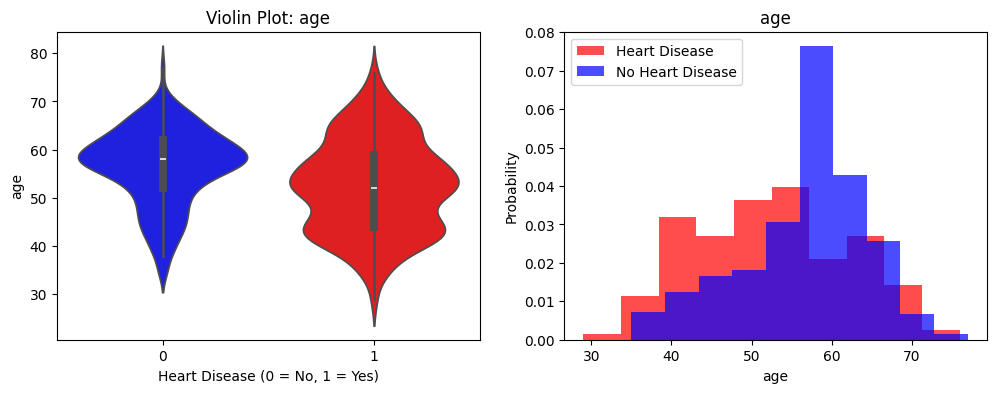

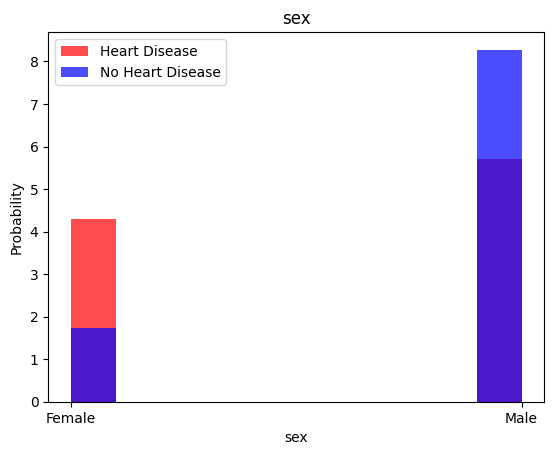

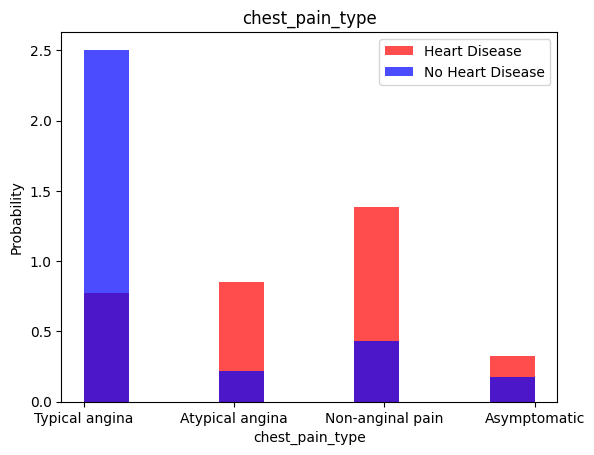

C:\Users\Control\AppData\Local\Temp\ipykernel_4600\2767869061.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='target', y=label, data=HeartRisk, palette={'0': "blue", '1': "red"}, ax=ax[0])


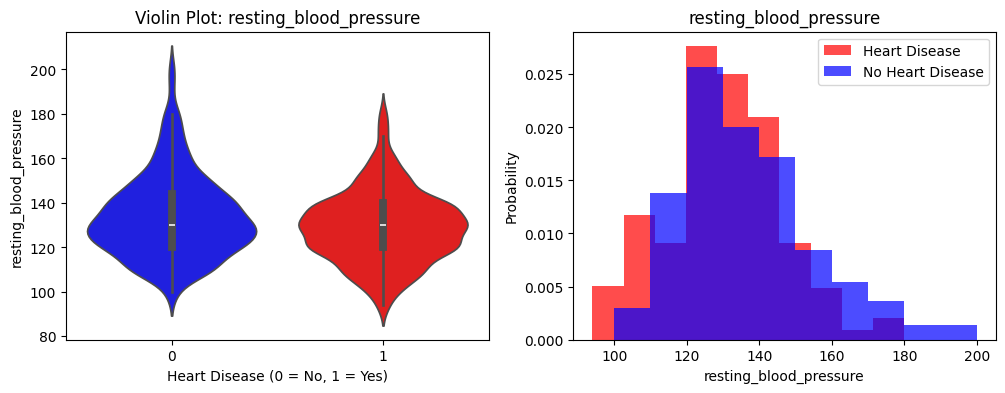

C:\Users\Control\AppData\Local\Temp\ipykernel_4600\2767869061.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='target', y=label, data=HeartRisk, palette={'0': "blue", '1': "red"}, ax=ax[0])


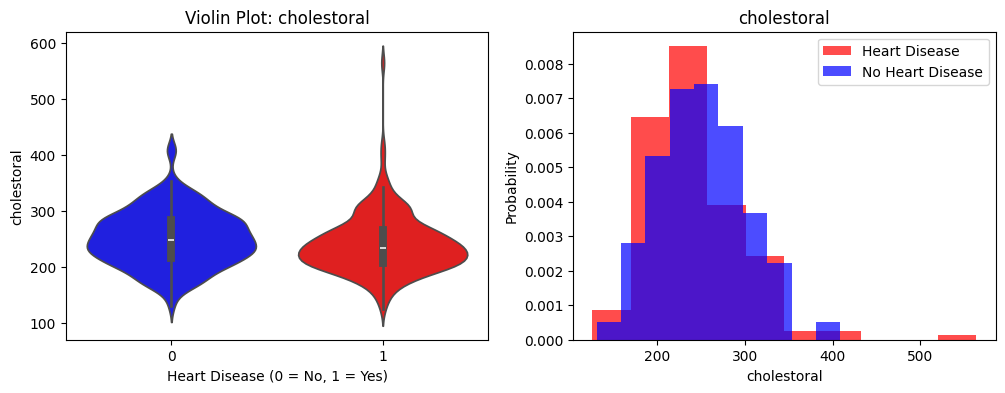

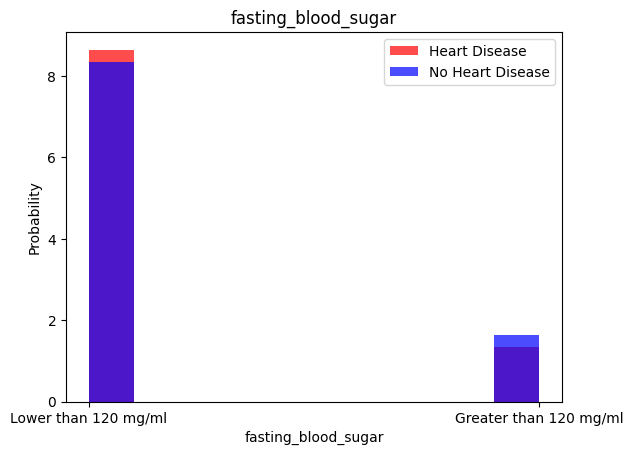

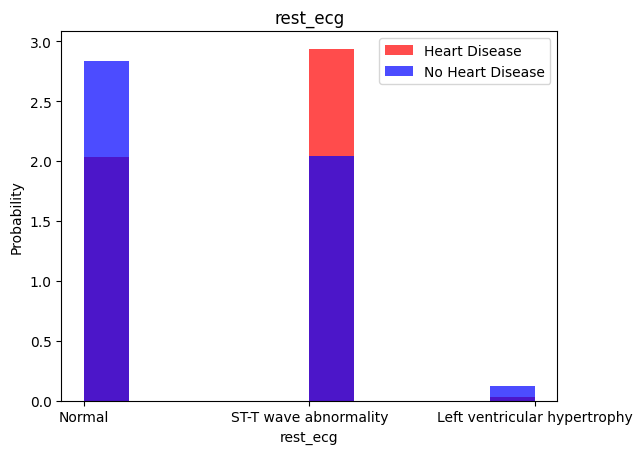

C:\Users\Control\AppData\Local\Temp\ipykernel_4600\2767869061.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='target', y=label, data=HeartRisk, palette={'0': "blue", '1': "red"}, ax=ax[0])


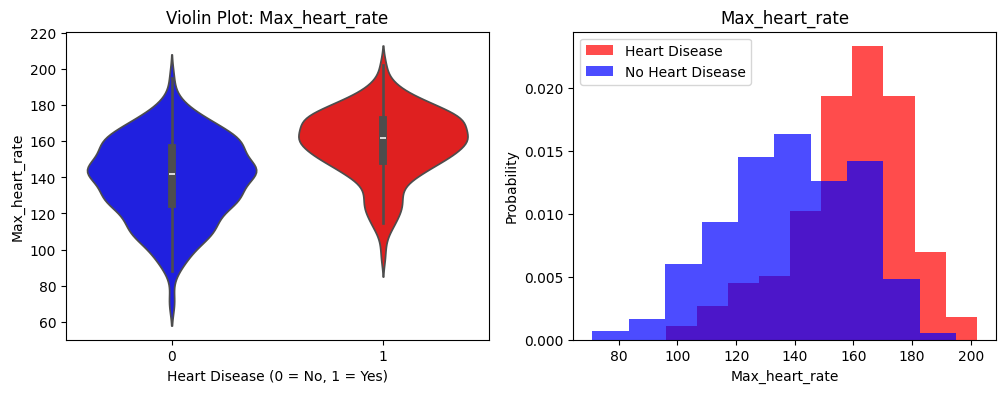

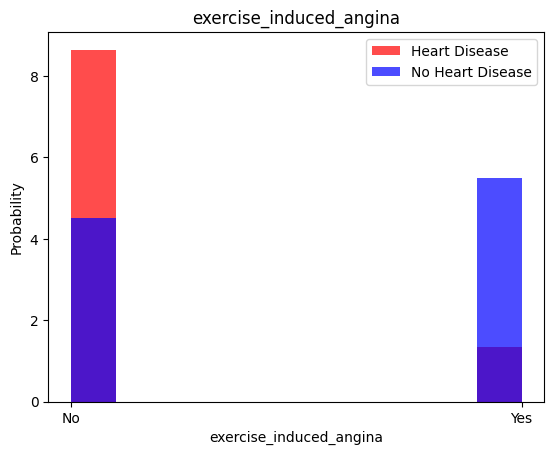

C:\Users\Control\AppData\Local\Temp\ipykernel_4600\2767869061.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='target', y=label, data=HeartRisk, palette={'0': "blue", '1': "red"}, ax=ax[0])


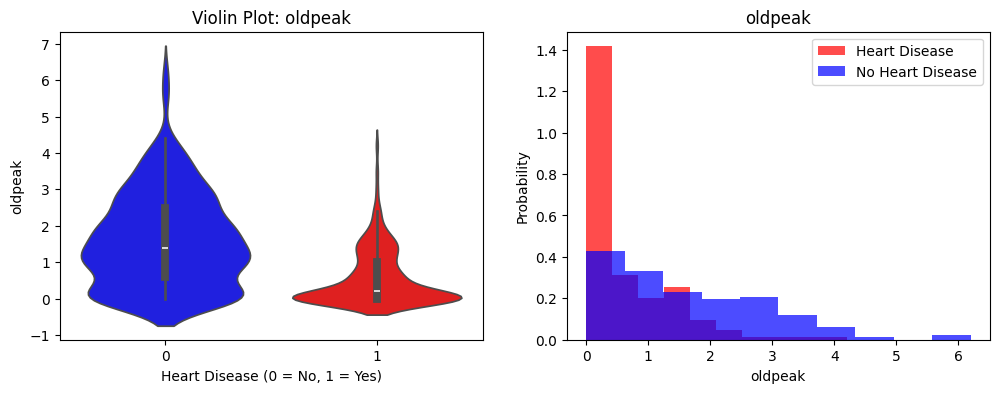

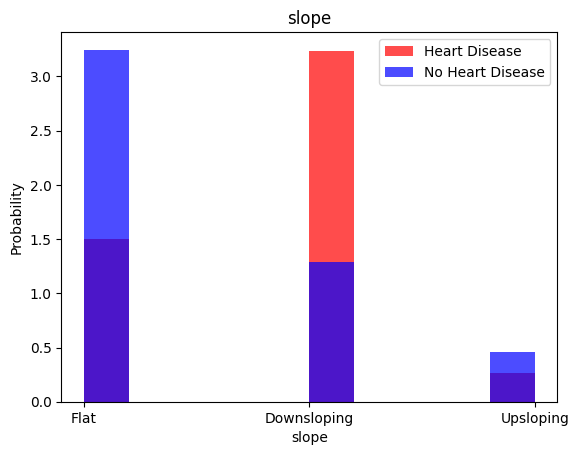

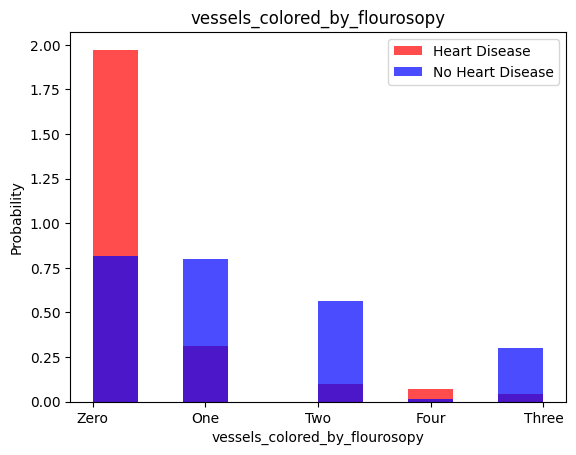

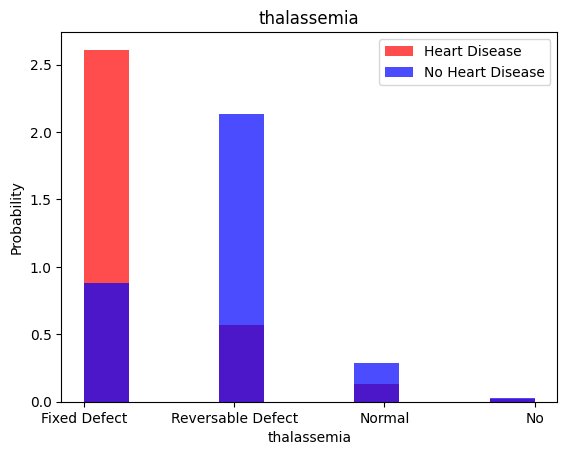

C:\Users\Control\AppData\Local\Temp\ipykernel_4600\2767869061.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='target', y=label, data=HeartRisk, palette={'0': "blue", '1': "red"}, ax=ax[0])


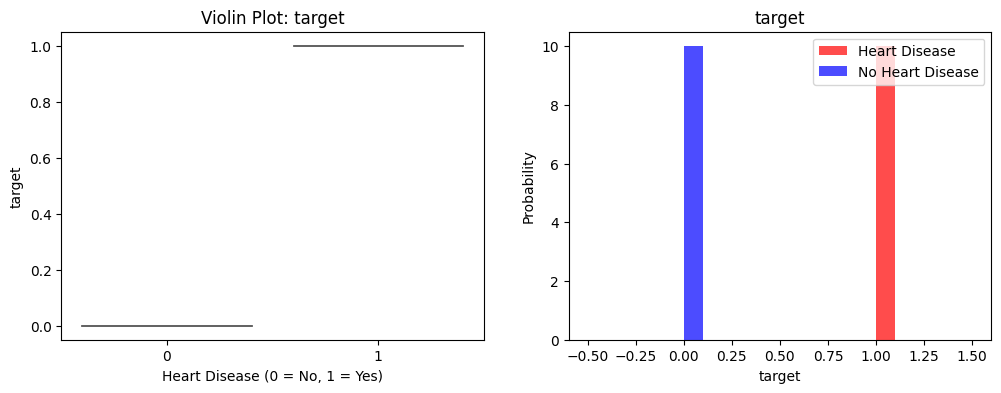

In [9]:
# To look at features compared to target 
for label in HeartRisk.columns:
    if HeartRisk[label].dtype in ['int64', 'float64']:
        fig, ax = plt.subplots(1,2, figsize=(12,4))
        sns.violinplot(x='target', y=label, data=HeartRisk, palette={'0': "blue", '1': "red"}, ax=ax[0])
        ax[0].set_title(f"Violin Plot: {label}")
        ax[0].set_xlabel("Heart Disease (0 = No, 1 = Yes)")
        ax[0].set_ylabel(label)
    
    plt.hist(HeartRisk[HeartRisk['target']==1][label], color='red', label='Heart Disease', alpha=0.7, density=True)
    plt.hist(HeartRisk[HeartRisk['target']==0][label], color='blue', label='No Heart Disease', alpha=0.7, density=True)
    plt.title(label)
    plt.ylabel("Probability")
    plt.xlabel(label)
    plt.legend()
    plt.show()


In [13]:
# Train, validation, test datasets
train, valid, test = np.split(HeartRisk_new.sample(frac=1), [int(.6*len(HeartRisk_new)), int(0.8*len(HeartRisk_new))])


c:\Users\Control\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\_core\fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [ ]:
# We want the target variables 0, 1 to be as close to each other as possible in terms of the amount
def sampler_df(dataframe, oversample=False):
    x = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values

    if oversample:
        ros = RandomOverSampler()
        x, y = ros.fit_resample(x, y)
    
    data = np.hstack((x, np.reshape(y, (-1, 1))))
    return data, x, y


train, x_train, y_train = sampler_df(train, oversample=True)

In [15]:
valid, x_valid, y_valid = sampler_df(valid, oversample=False)
test, x_test, y_test = sampler_df(test, oversample=False)

In [16]:
len(y_train)

748

In [17]:
sum(y_train == 1)

np.int64(374)

In [18]:
sum(y_train == 0)

np.int64(374)

In [36]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay

knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

              precision    recall  f1-score   support

           0       0.98      0.95      0.97       131
           1       0.92      0.96      0.94        74

    accuracy                           0.96       205
   macro avg       0.95      0.96      0.95       205
weighted avg       0.96      0.96      0.96       205



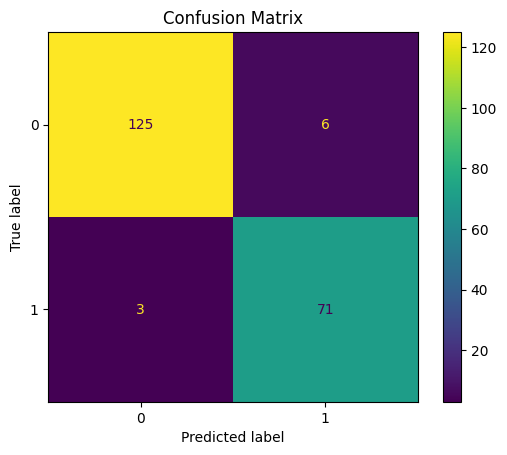

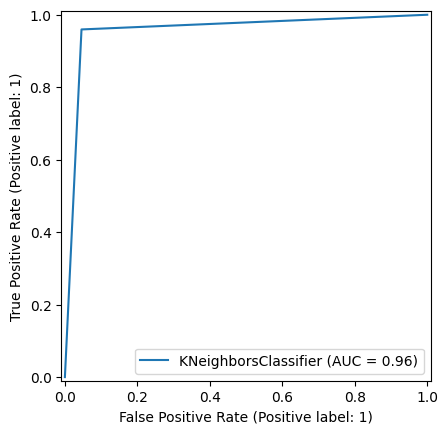

In [13]:
# Accuracy and precission report 
y_pred = knn_model.predict(x_test)
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix")
plt.show()

RocCurveDisplay.from_estimator(knn_model, x_test, y_test)
plt.show()

In [14]:
# NB 
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model = nb_model.fit(x_train, y_train)

              precision    recall  f1-score   support

           0       1.00      0.17      0.29       131
           1       0.40      1.00      0.58        74

    accuracy                           0.47       205
   macro avg       0.70      0.58      0.43       205
weighted avg       0.78      0.47      0.39       205



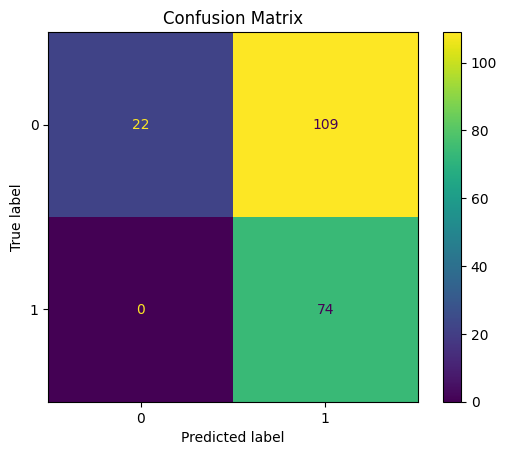

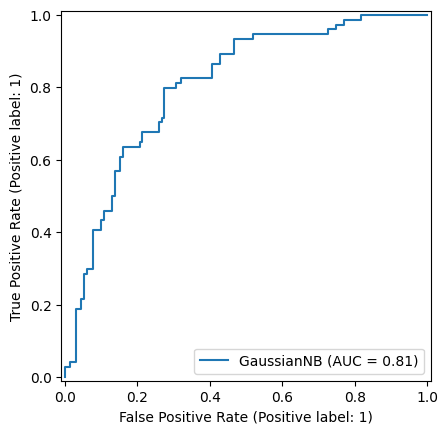

In [15]:
y_pred = nb_model.predict(x_test)
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix")
plt.show()

RocCurveDisplay.from_estimator(nb_model, x_test, y_test)
plt.show()

In [16]:
# Logistic Regression 
from sklearn.linear_model import LogisticRegression

lg_model = LogisticRegression(random_state=0)
lg_model = lg_model.fit(x_train, y_train)


c:\Users\Control\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.82      0.76      0.79       131
           1       0.62      0.72      0.67        74

    accuracy                           0.74       205
   macro avg       0.72      0.74      0.73       205
weighted avg       0.75      0.74      0.74       205



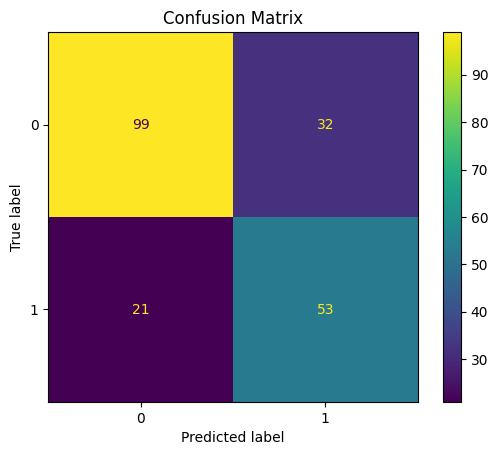

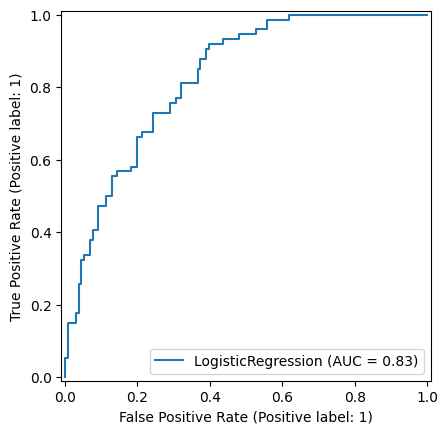

In [17]:
y_pred = lg_model.predict(x_test)
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix")
plt.show()

RocCurveDisplay.from_estimator(lg_model, x_test, y_test)
plt.show()

In [18]:
# Random Forest 
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=0, max_depth=15)
rf_model = rf_model.fit(x_train, y_train)

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       131
           1       0.95      0.95      0.95        74

    accuracy                           0.96       205
   macro avg       0.96      0.96      0.96       205
weighted avg       0.96      0.96      0.96       205



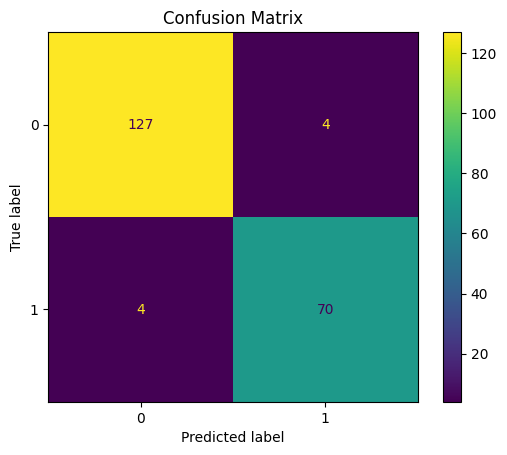

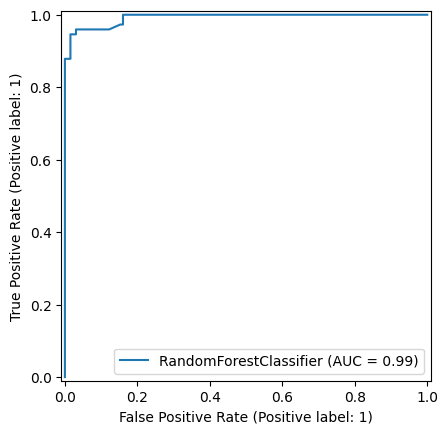

In [19]:
y_pred = rf_model.predict(x_test)
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix")
plt.show()

RocCurveDisplay.from_estimator(rf_model, x_test, y_test)
plt.show()


In [20]:
# SVM
from sklearn.svm import SVC

svm_model = SVC(random_state=0, gamma='auto', class_weight='balanced')
svm_model = svm_model.fit(x_train, y_train)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       131
           1       1.00      0.92      0.96        74

    accuracy                           0.97       205
   macro avg       0.98      0.96      0.97       205
weighted avg       0.97      0.97      0.97       205



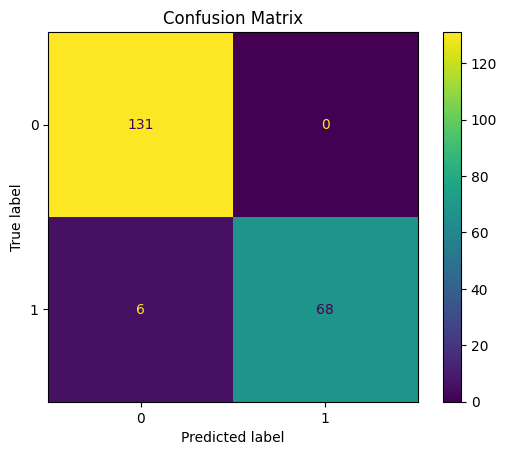

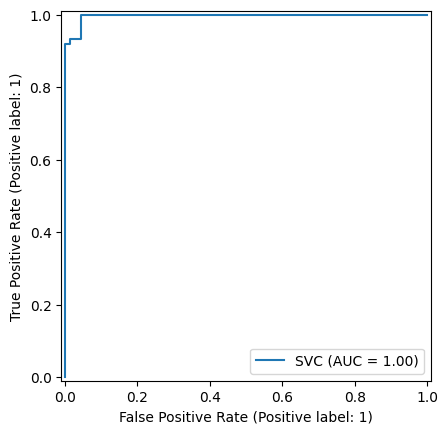

In [21]:
y_pred = svm_model.predict(x_test)
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix")
plt.show()

RocCurveDisplay.from_estimator(svm_model, x_test, y_test)
plt.show()


In [ ]:
# Function to plot each iteration my function goes through for each model parameter. Plots loss and accuracy graphs of train vs valid
def plot_history(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
    ax1.plot(history.history['loss'], label='loss')
    ax1.plot(history.history['val_loss'], label='val_loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Binary crossentropy')
    ax1.legend()
    ax1.grid(True)

    ax2.plot(history.history['accuracy'], label='accuracy')
    ax2.plot(history.history['val_accuracy'], label='val_accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.grid(True)

    plt.show()

In [24]:
# Neural Network 
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(10,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
nn_model.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss='binary_crossentropy', 
                 metrics=['accuracy'])



c:\Users\Control\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:

# I needed to create a function because I wanted the neural net to go through a series of parameters and choose the best one 
def train_model(x_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
    nn_model = tf.keras.Sequential([
        tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(x_train.shape[1],)),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(num_nodes, activation='relu'),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr), loss='binary_crossentropy', 
                 metrics=['accuracy']
    )
    history = nn_model.fit(
    x_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0
    )
    return nn_model, history


16 nodes, dropout 0, lr 0.01, batch_size 16


c:\Users\Control\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


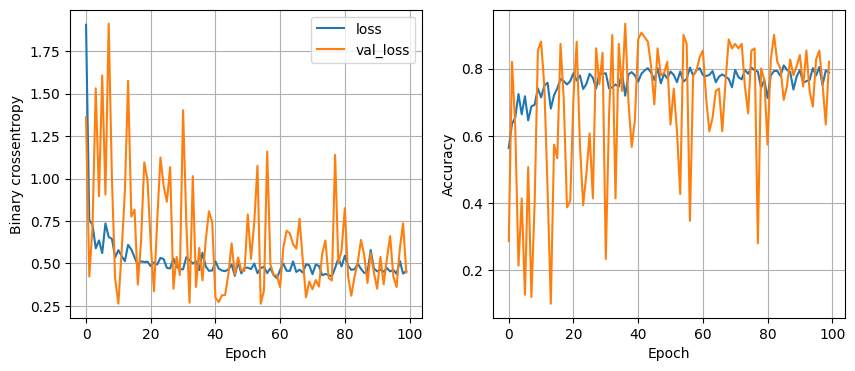

16 nodes, dropout 0, lr 0.01, batch_size 32


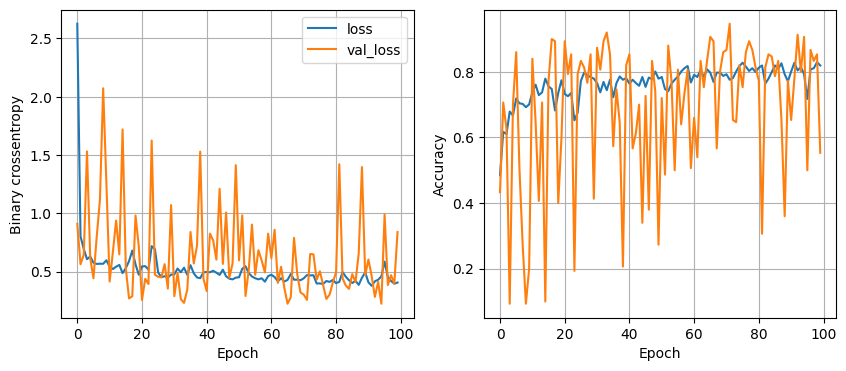

16 nodes, dropout 0, lr 0.01, batch_size 64


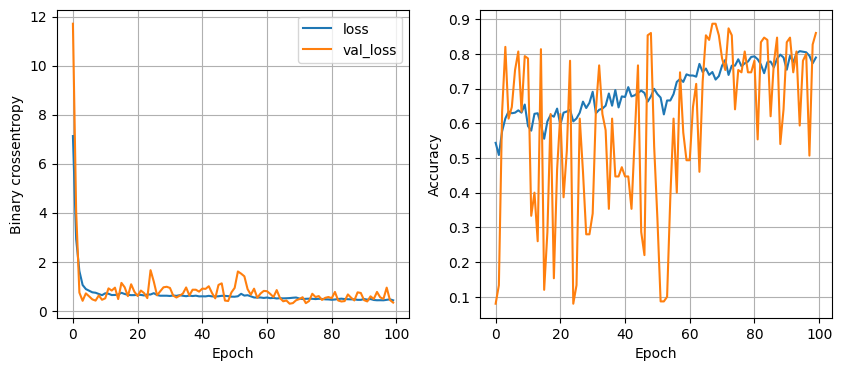

16 nodes, dropout 0, lr 0.005, batch_size 16


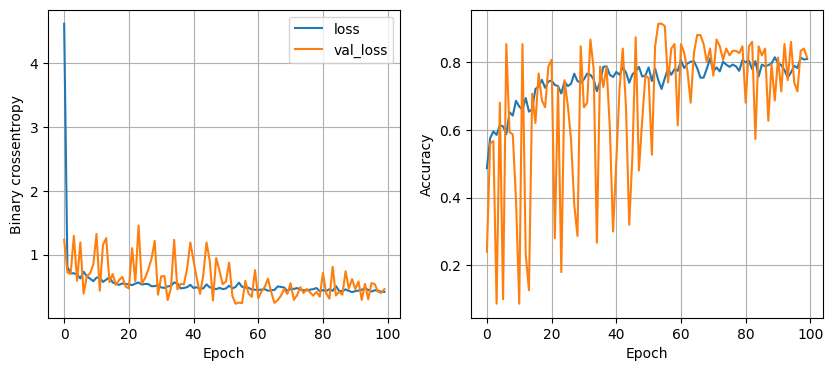

16 nodes, dropout 0, lr 0.005, batch_size 32


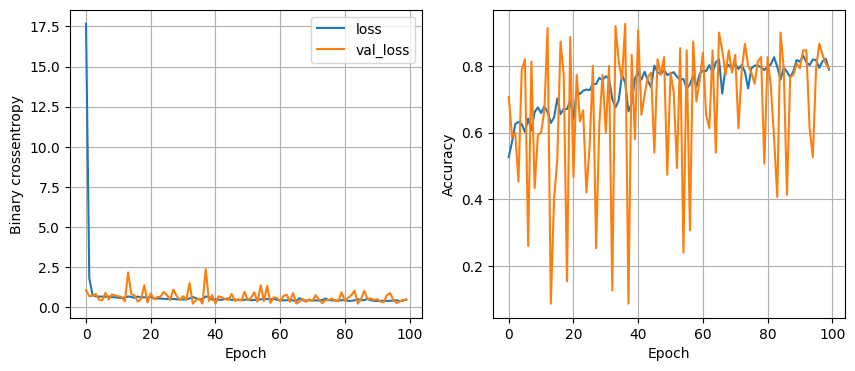

16 nodes, dropout 0, lr 0.005, batch_size 64


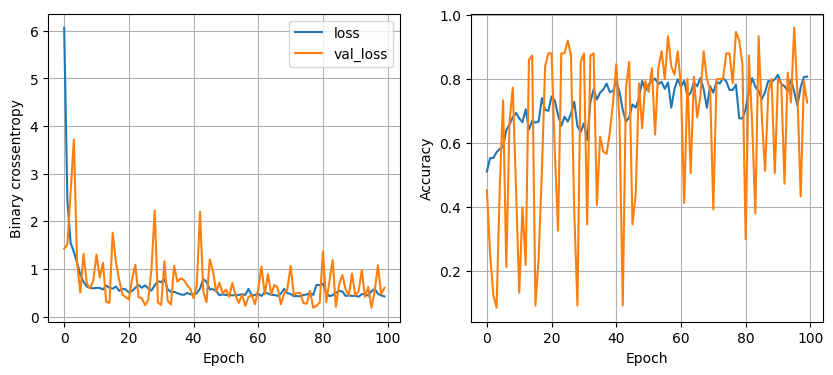

16 nodes, dropout 0, lr 0.001, batch_size 16


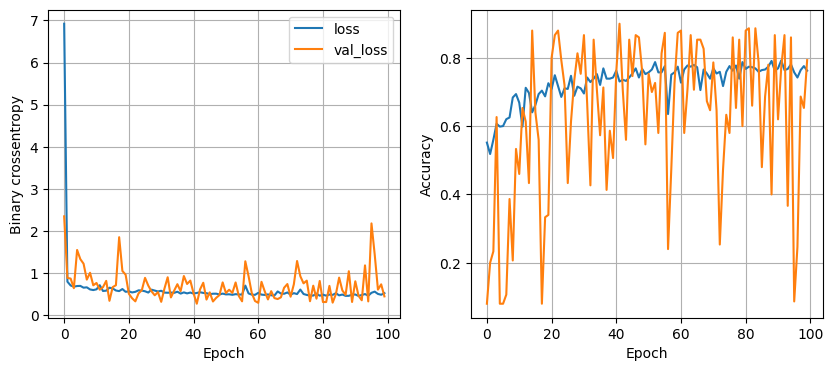

16 nodes, dropout 0, lr 0.001, batch_size 32


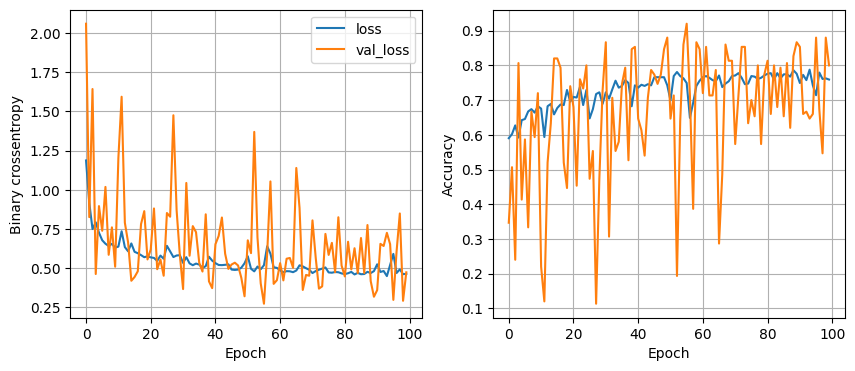

16 nodes, dropout 0, lr 0.001, batch_size 64


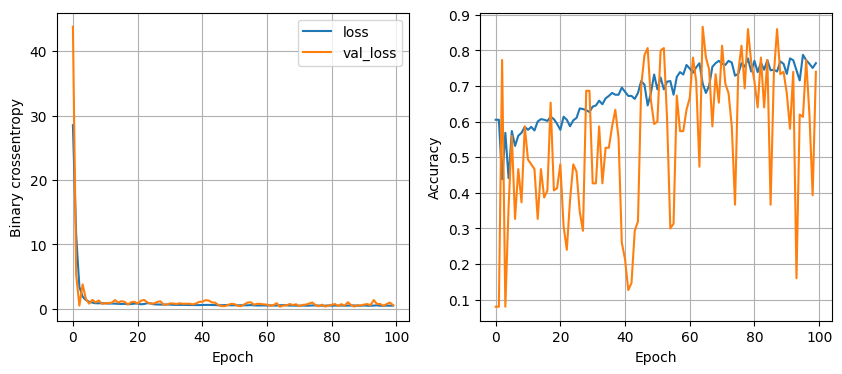

16 nodes, dropout 0.2, lr 0.01, batch_size 16


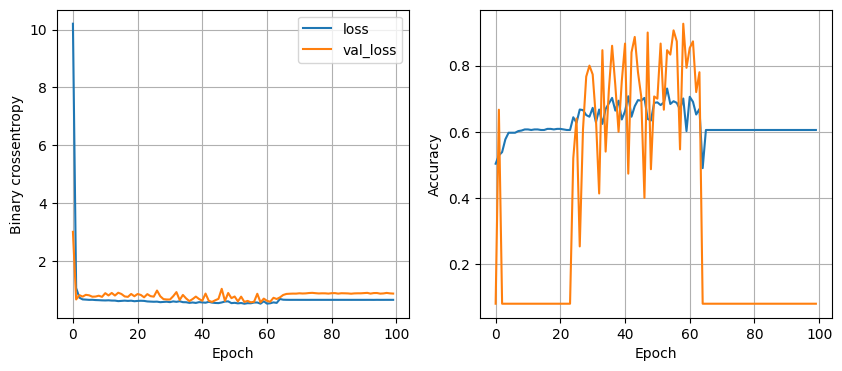

16 nodes, dropout 0.2, lr 0.01, batch_size 32


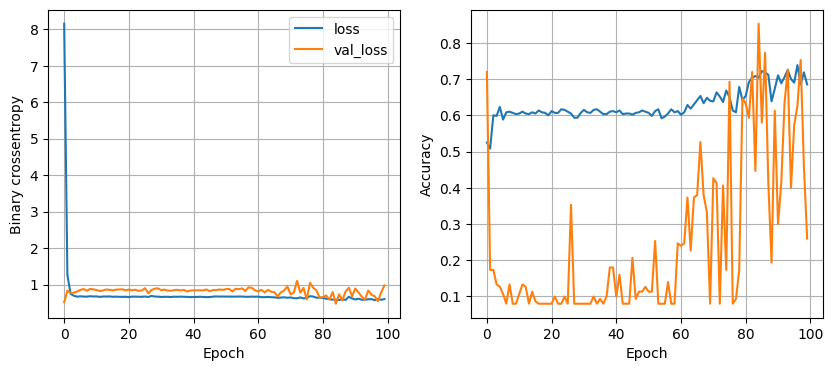

16 nodes, dropout 0.2, lr 0.01, batch_size 64


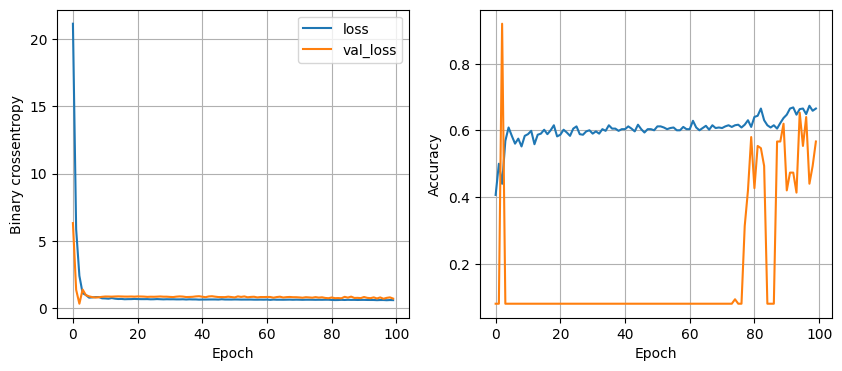

16 nodes, dropout 0.2, lr 0.005, batch_size 16


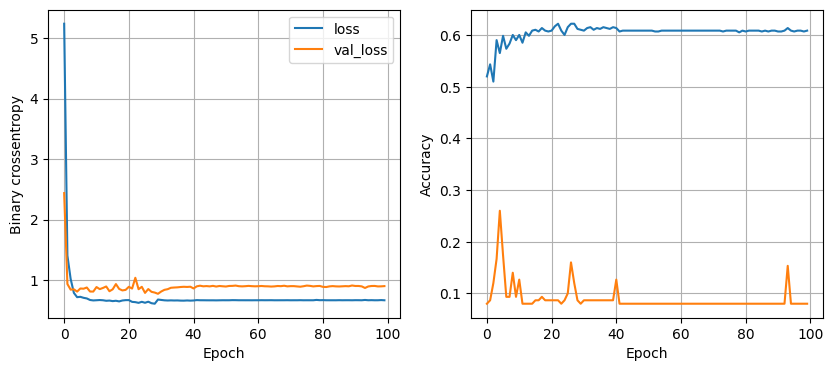

16 nodes, dropout 0.2, lr 0.005, batch_size 32


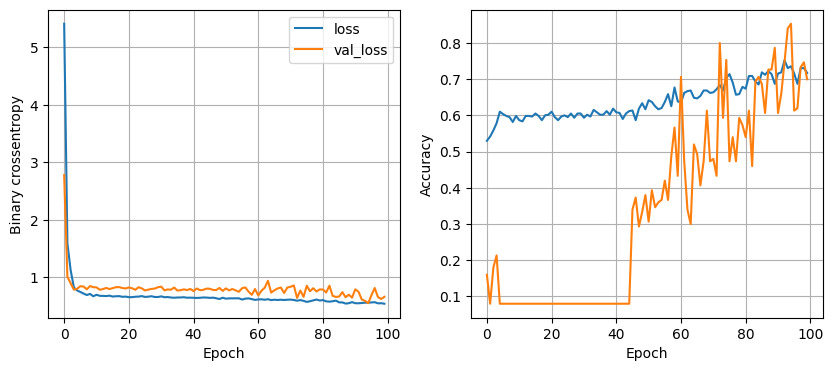

16 nodes, dropout 0.2, lr 0.005, batch_size 64


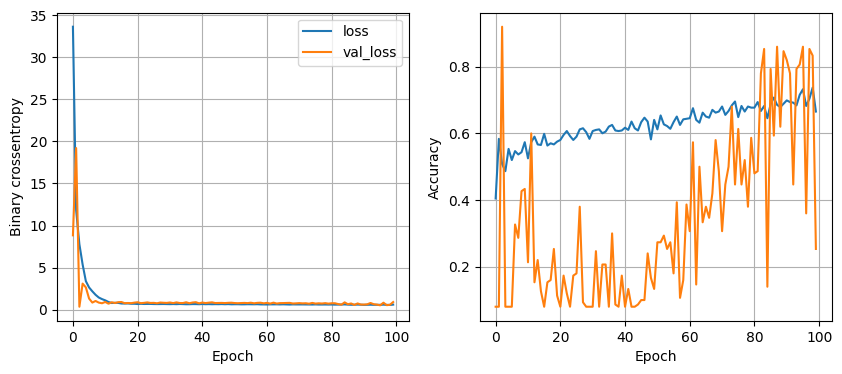

16 nodes, dropout 0.2, lr 0.001, batch_size 16


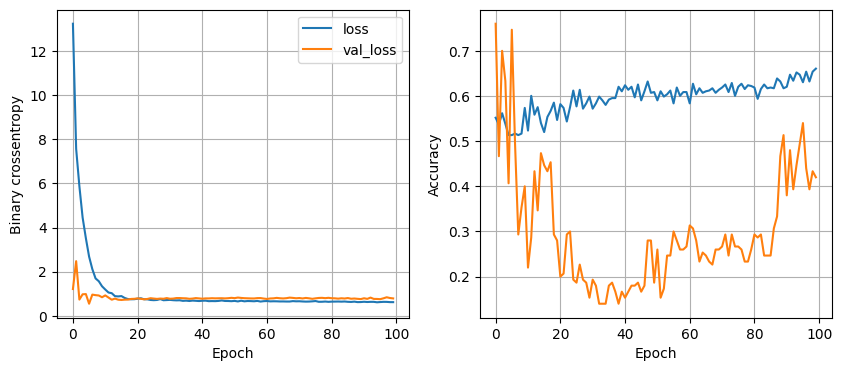

16 nodes, dropout 0.2, lr 0.001, batch_size 32


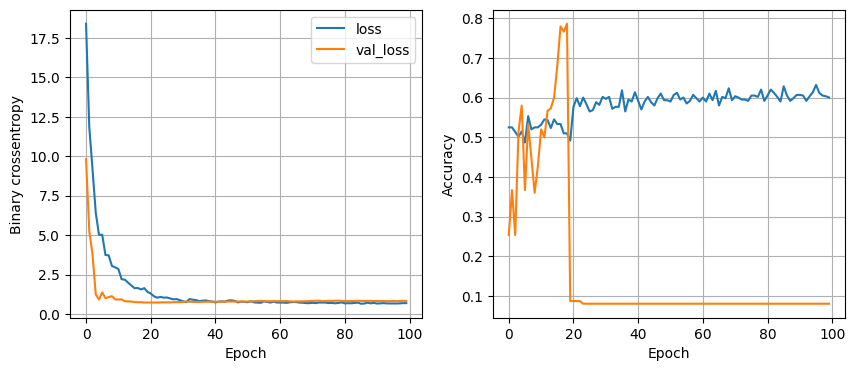

16 nodes, dropout 0.2, lr 0.001, batch_size 64


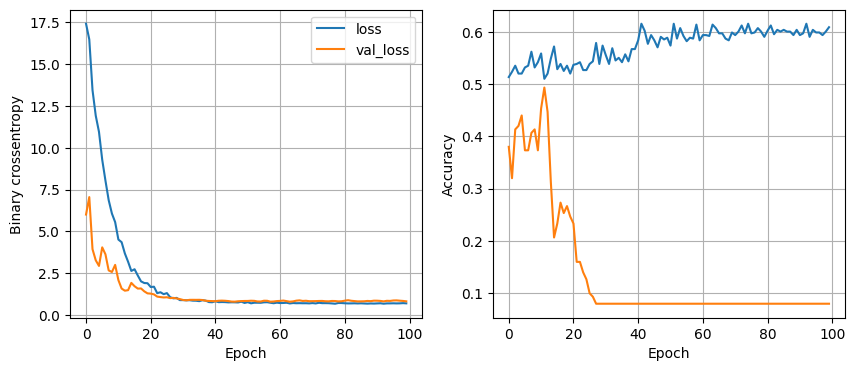

32 nodes, dropout 0, lr 0.01, batch_size 16


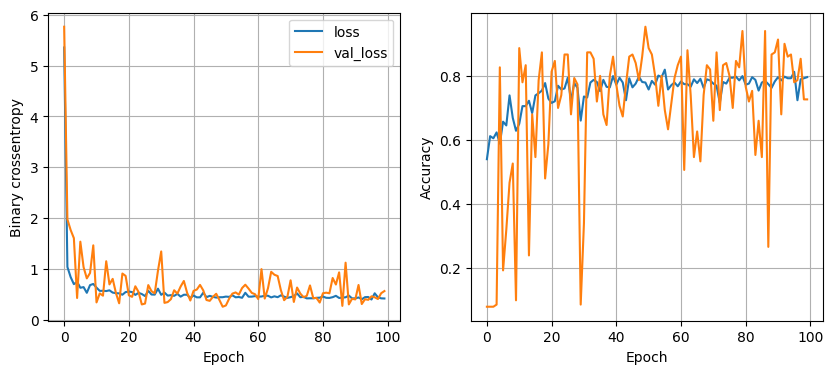

32 nodes, dropout 0, lr 0.01, batch_size 32


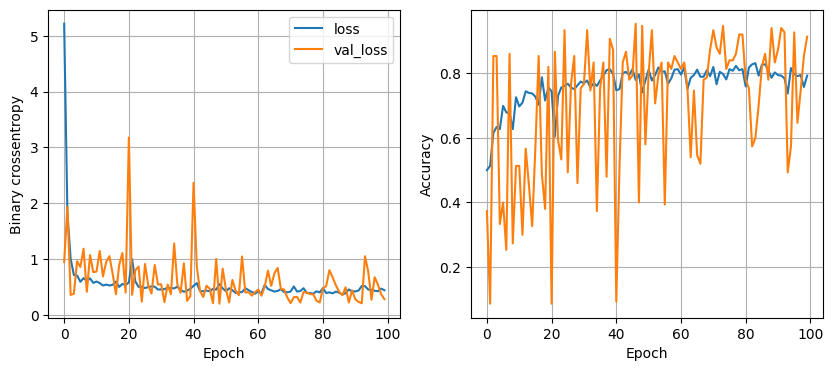

32 nodes, dropout 0, lr 0.01, batch_size 64


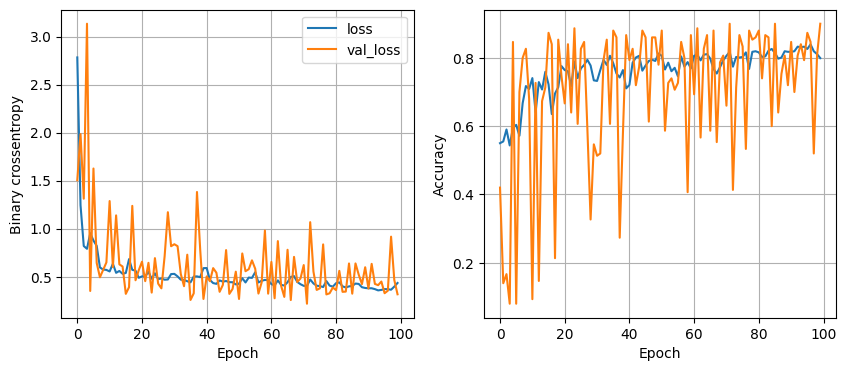

32 nodes, dropout 0, lr 0.005, batch_size 16


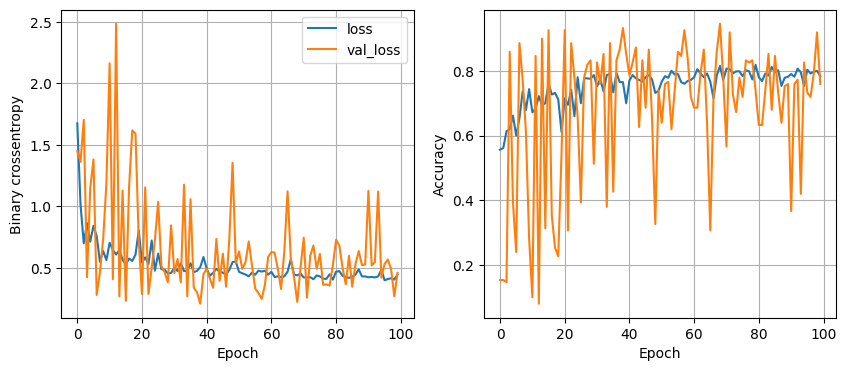

32 nodes, dropout 0, lr 0.005, batch_size 32


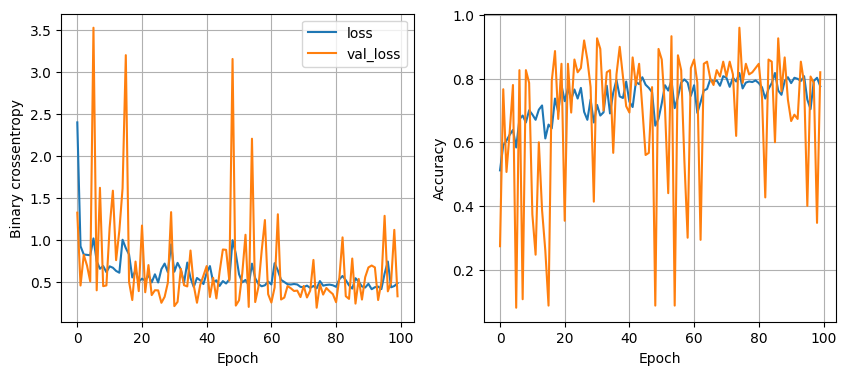

32 nodes, dropout 0, lr 0.005, batch_size 64


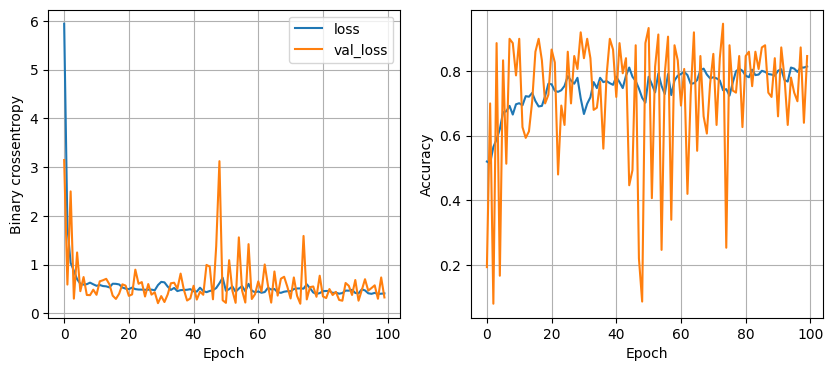

32 nodes, dropout 0, lr 0.001, batch_size 16


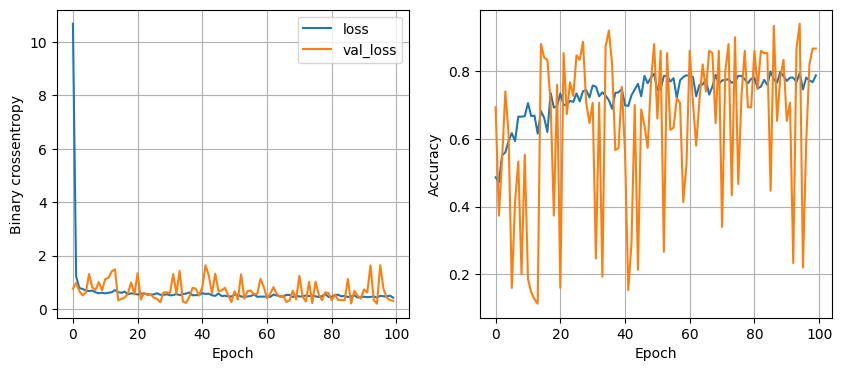

32 nodes, dropout 0, lr 0.001, batch_size 32


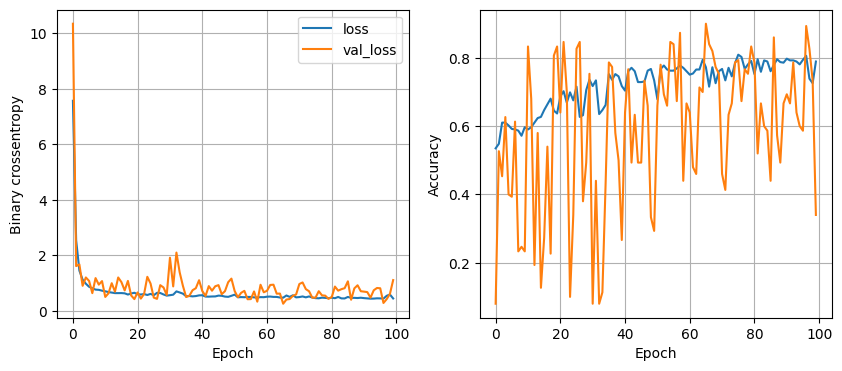

32 nodes, dropout 0, lr 0.001, batch_size 64


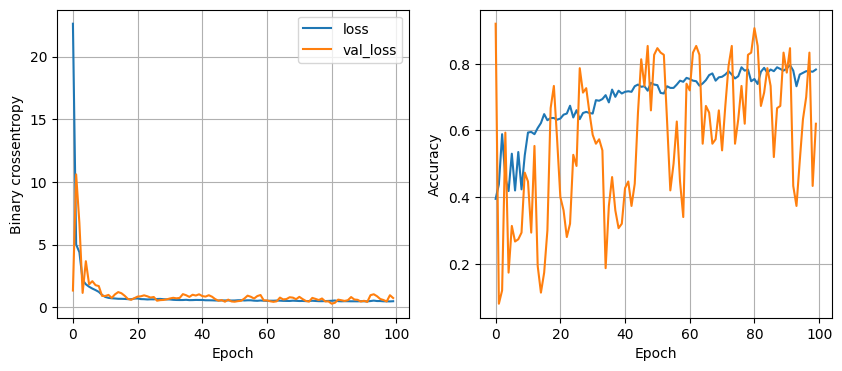

32 nodes, dropout 0.2, lr 0.01, batch_size 16


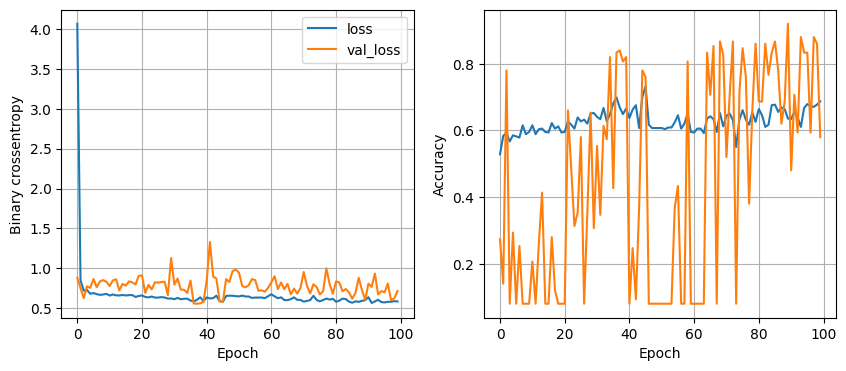

32 nodes, dropout 0.2, lr 0.01, batch_size 32


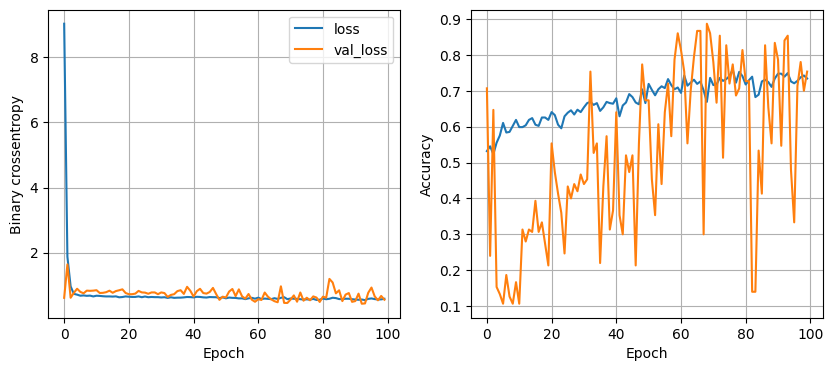

32 nodes, dropout 0.2, lr 0.01, batch_size 64


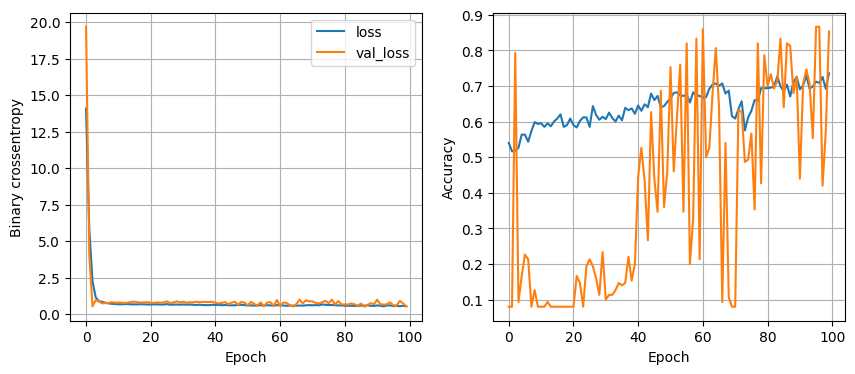

32 nodes, dropout 0.2, lr 0.005, batch_size 16


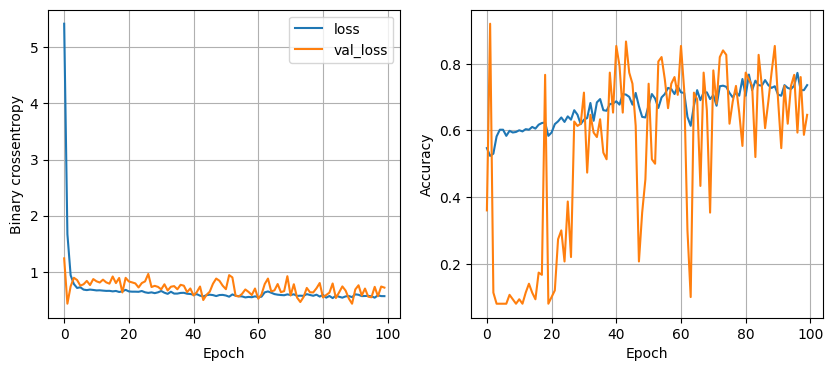

32 nodes, dropout 0.2, lr 0.005, batch_size 32


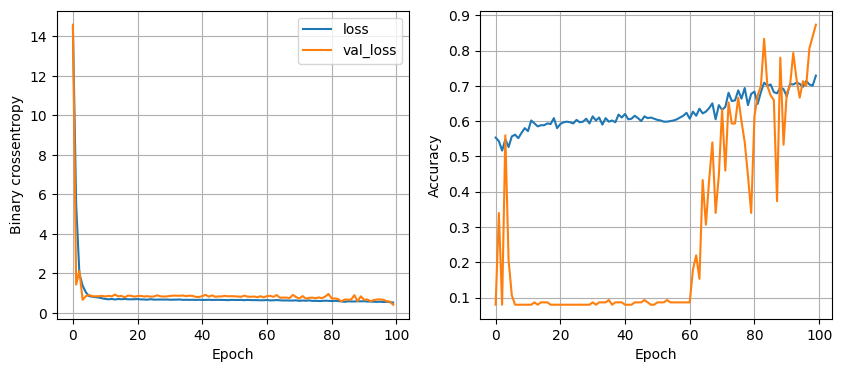

32 nodes, dropout 0.2, lr 0.005, batch_size 64


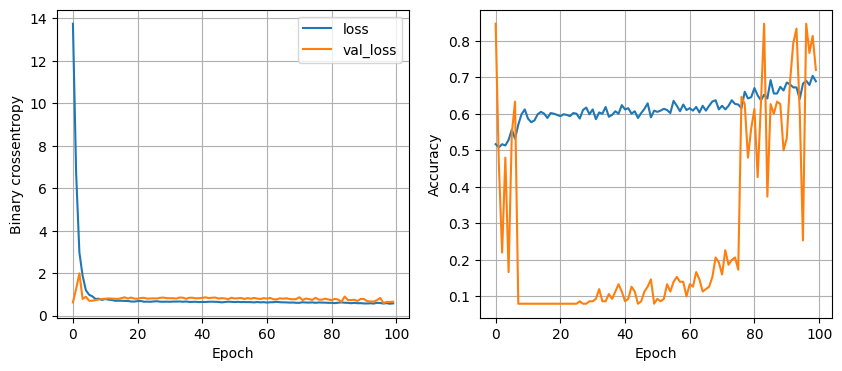

32 nodes, dropout 0.2, lr 0.001, batch_size 16


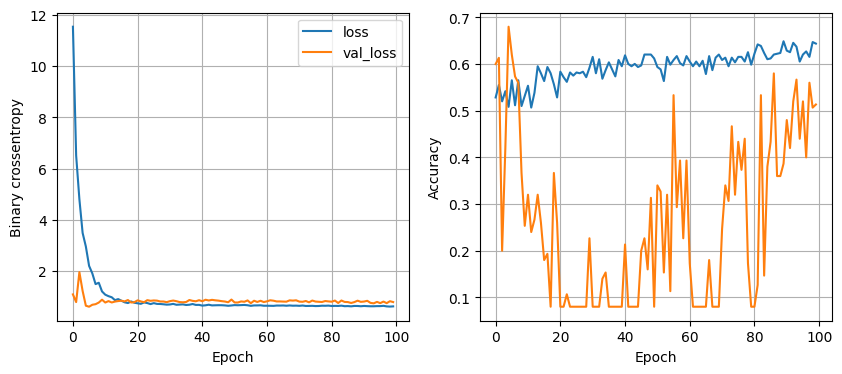

32 nodes, dropout 0.2, lr 0.001, batch_size 32


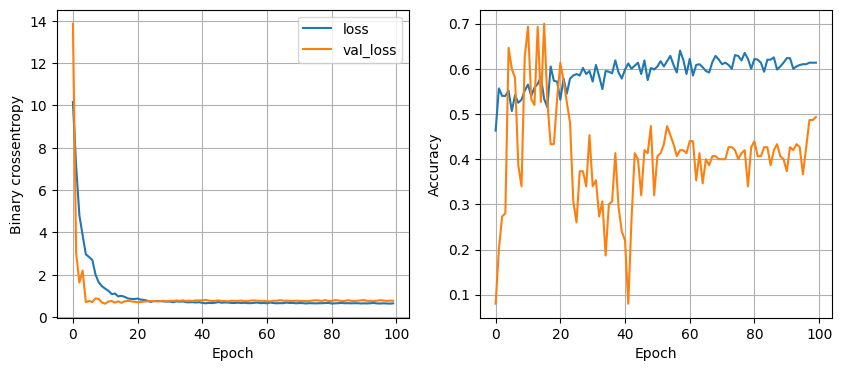

32 nodes, dropout 0.2, lr 0.001, batch_size 64


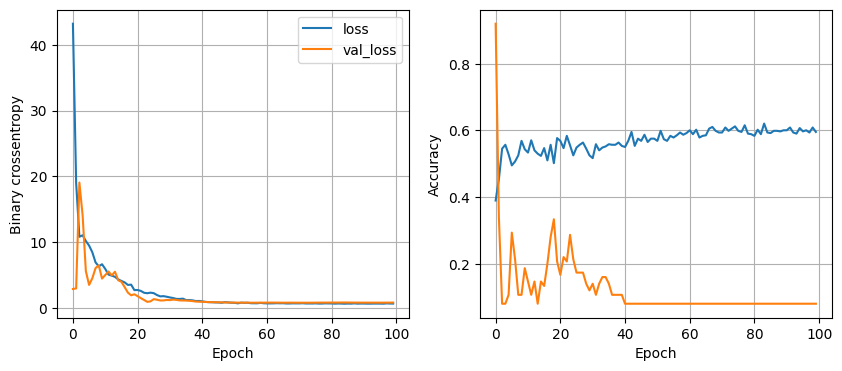

64 nodes, dropout 0, lr 0.01, batch_size 16


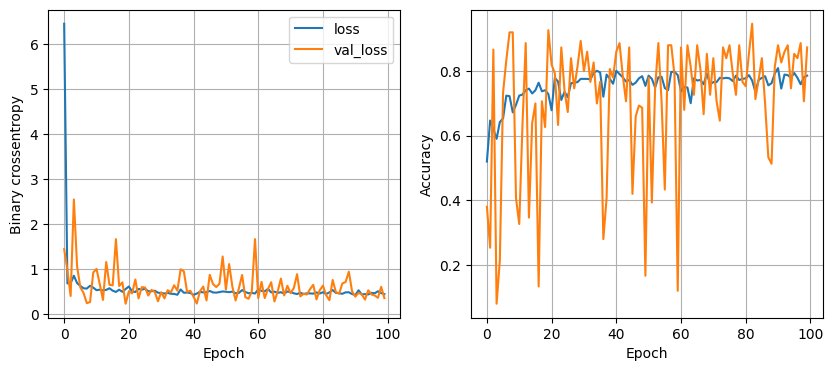

64 nodes, dropout 0, lr 0.01, batch_size 32


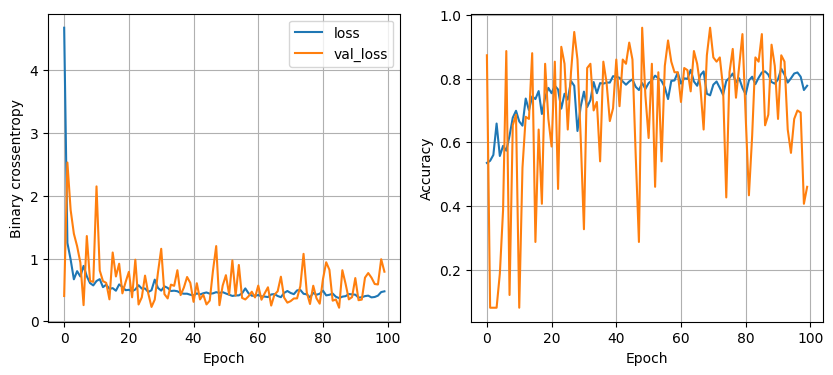

64 nodes, dropout 0, lr 0.01, batch_size 64


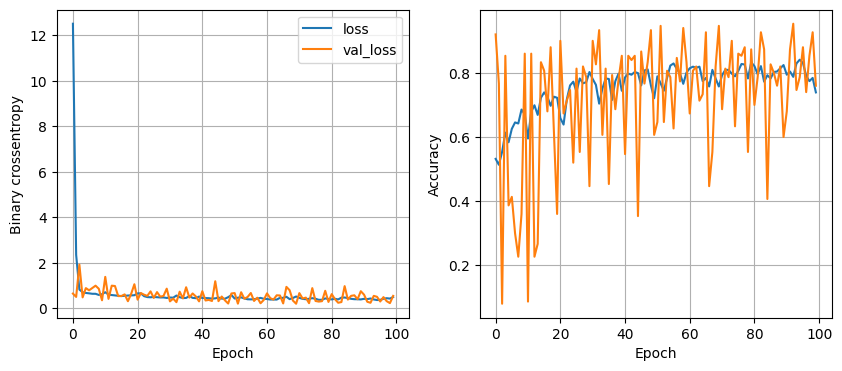

64 nodes, dropout 0, lr 0.005, batch_size 16


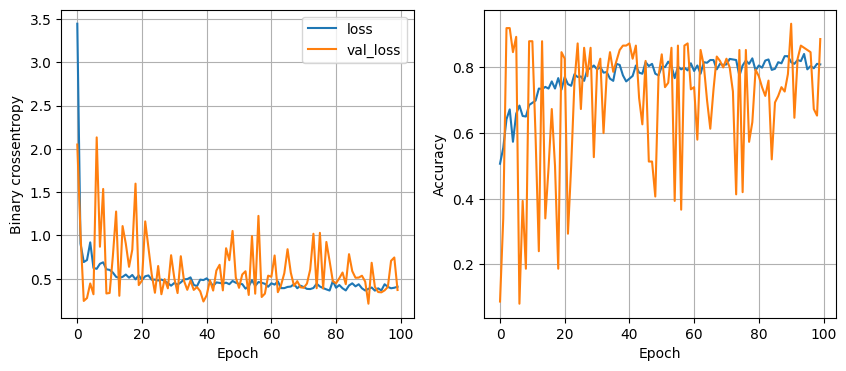

64 nodes, dropout 0, lr 0.005, batch_size 32


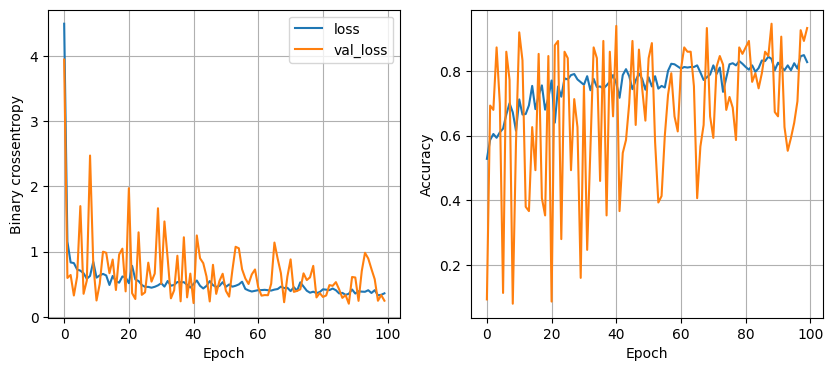

64 nodes, dropout 0, lr 0.005, batch_size 64


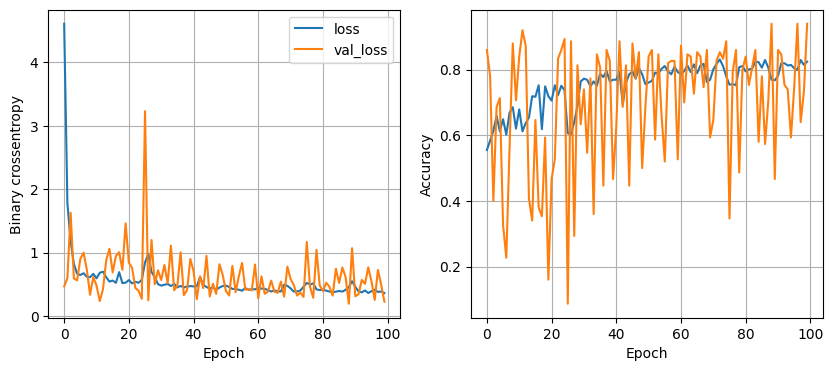

64 nodes, dropout 0, lr 0.001, batch_size 16


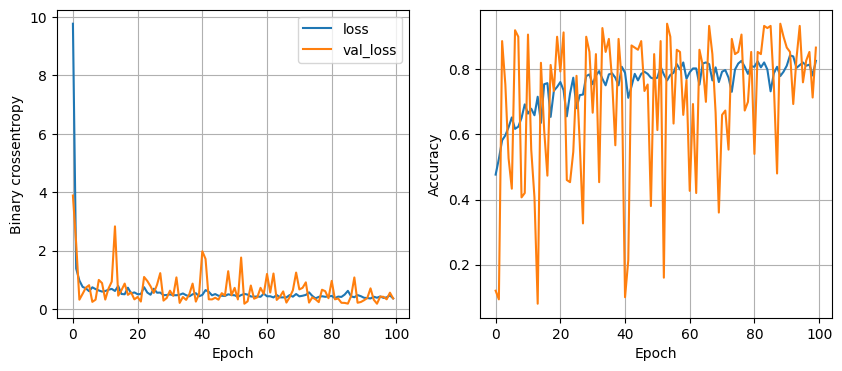

64 nodes, dropout 0, lr 0.001, batch_size 32


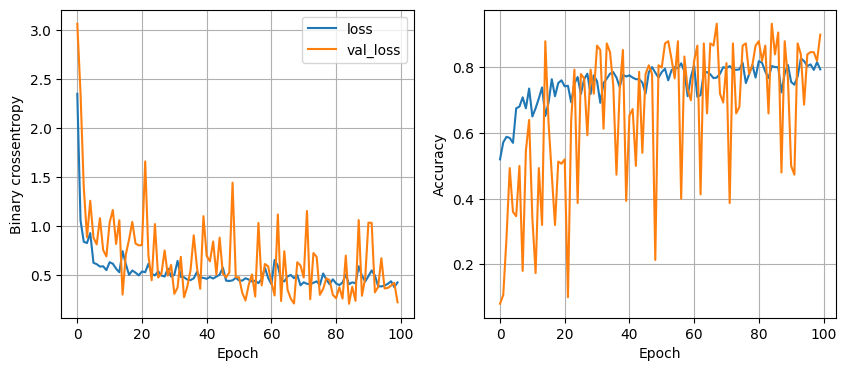

64 nodes, dropout 0, lr 0.001, batch_size 64


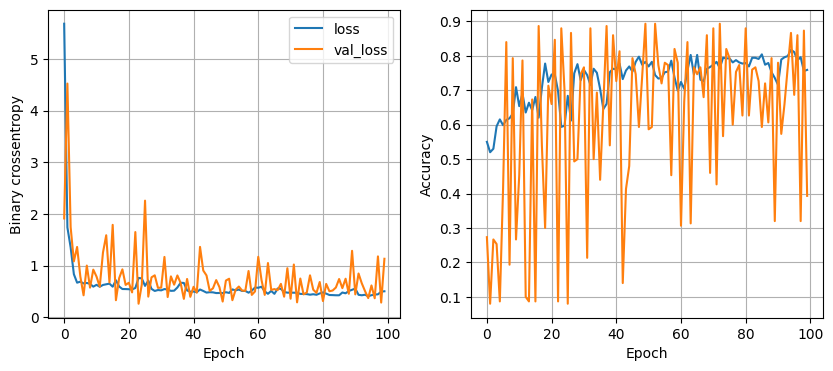

64 nodes, dropout 0.2, lr 0.01, batch_size 16


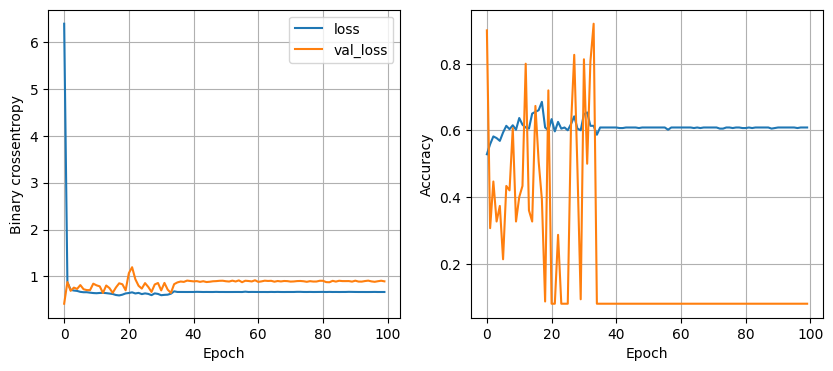

64 nodes, dropout 0.2, lr 0.01, batch_size 32


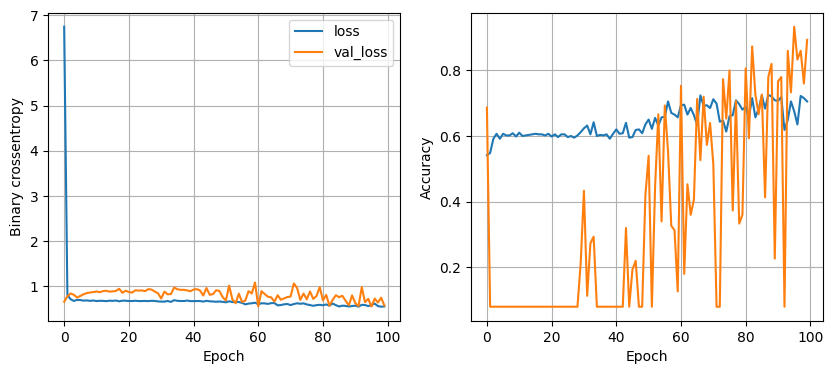

64 nodes, dropout 0.2, lr 0.01, batch_size 64


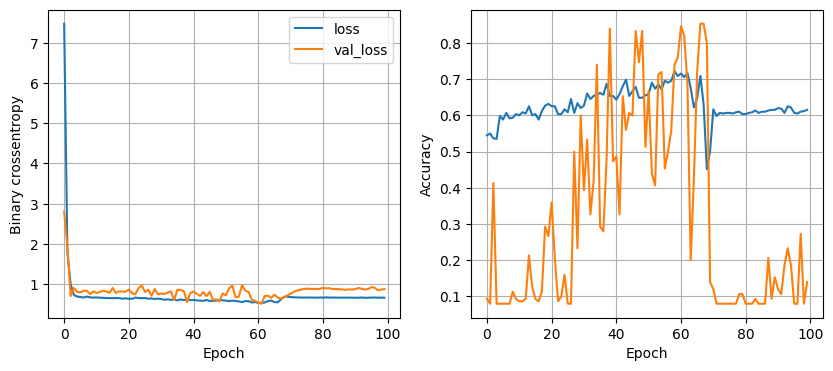

64 nodes, dropout 0.2, lr 0.005, batch_size 16


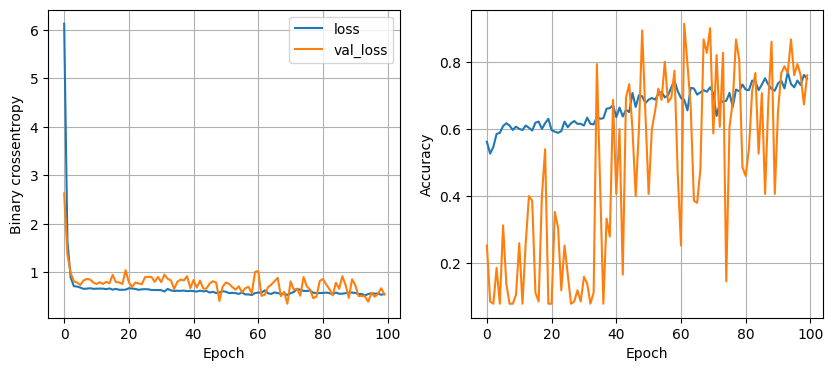

64 nodes, dropout 0.2, lr 0.005, batch_size 32


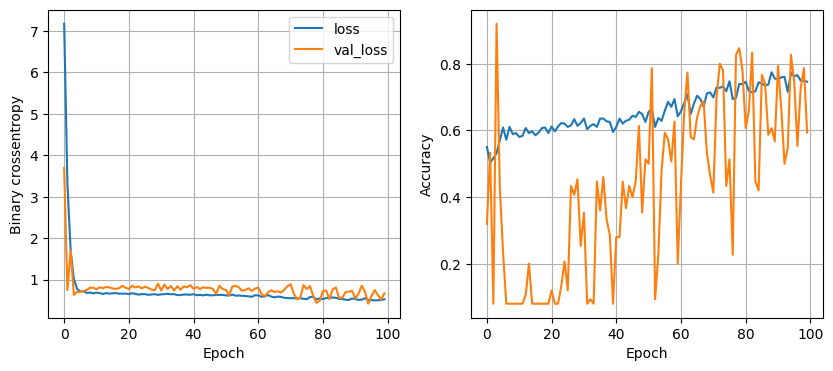

64 nodes, dropout 0.2, lr 0.005, batch_size 64


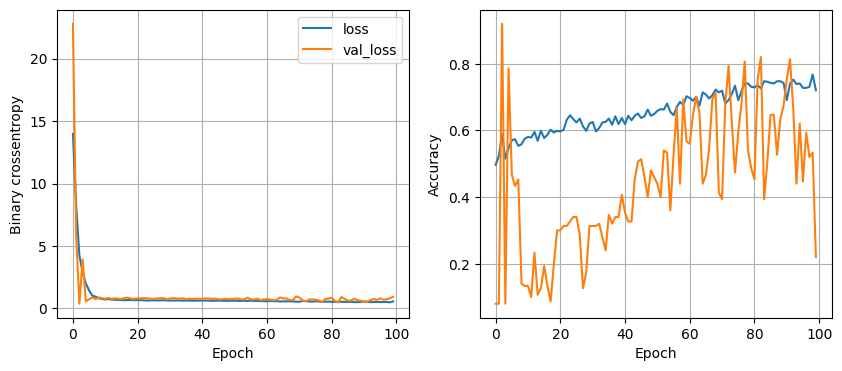

64 nodes, dropout 0.2, lr 0.001, batch_size 16


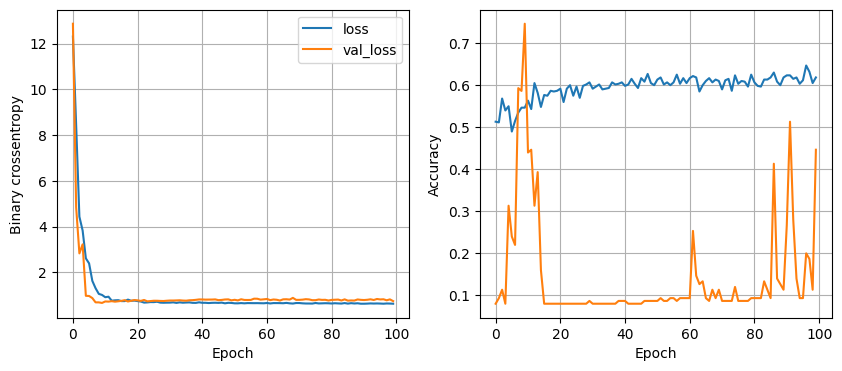

64 nodes, dropout 0.2, lr 0.001, batch_size 32


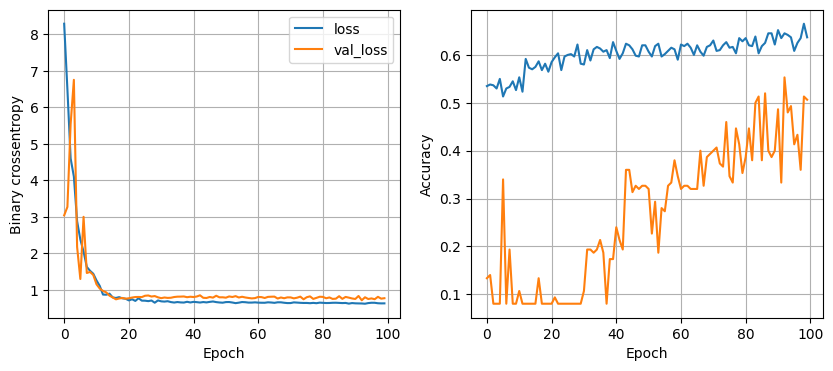

64 nodes, dropout 0.2, lr 0.001, batch_size 64


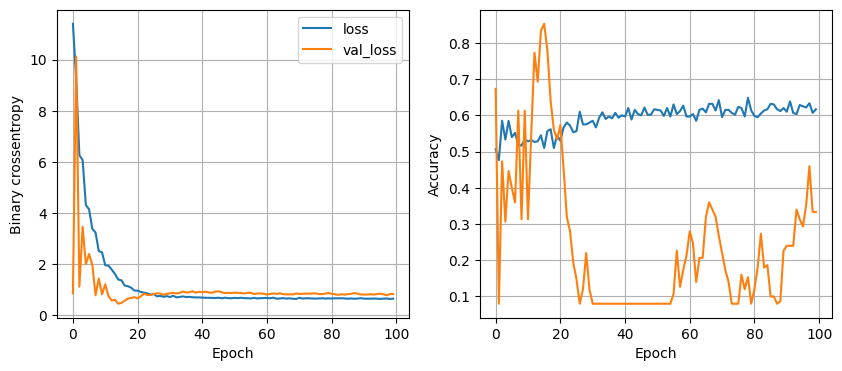

In [ ]:
least_val_loss = float('inf') # any model can be the score
least_loss_model = None # need to declare non before the if statement saves
epochs = 100
for num_nodes in [16, 32, 64]:
    for dropout_prob in [0, 0.2]:
        for lr in [0.01, 0.005, 0.001]:
            for batch_size in [16, 32, 64]:
                print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch_size {batch_size}")
                model, history = train_model(x_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs) # here the function is called 
                plot_history(history)

                val_loss = model.evaluate(x_valid, y_valid, verbose=0)[0] #this if statement saves the model with the lowest loss value 
                if val_loss < least_val_loss: # if the validation loss is less than the least
                    least_val_loss = val_loss
                    least_loss_model = model # earned the validation loss


In [ ]:
# test data 
y_pred = least_loss_model.predict(x_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1, ) #since I used a sigmoid function, the activation function is values from -1 to 1. The array given are values as close to 0 and 1. 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


              precision    recall  f1-score   support

           0       0.82      0.93      0.87       111
           1       0.90      0.76      0.82        94

    accuracy                           0.85       205
   macro avg       0.86      0.84      0.85       205
weighted avg       0.85      0.85      0.85       205



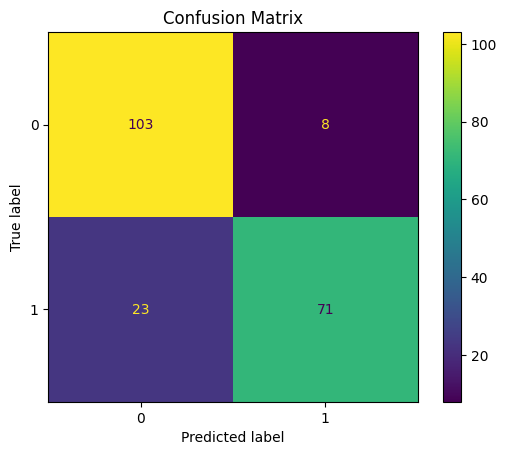

In [40]:
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix")
plt.show()
